In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df.isnull().sum()

,0
Category,0
Resume,0


In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['Category'].nunique()

25

In [9]:
categories = df['Category'].value_counts().reset_index()
categories

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


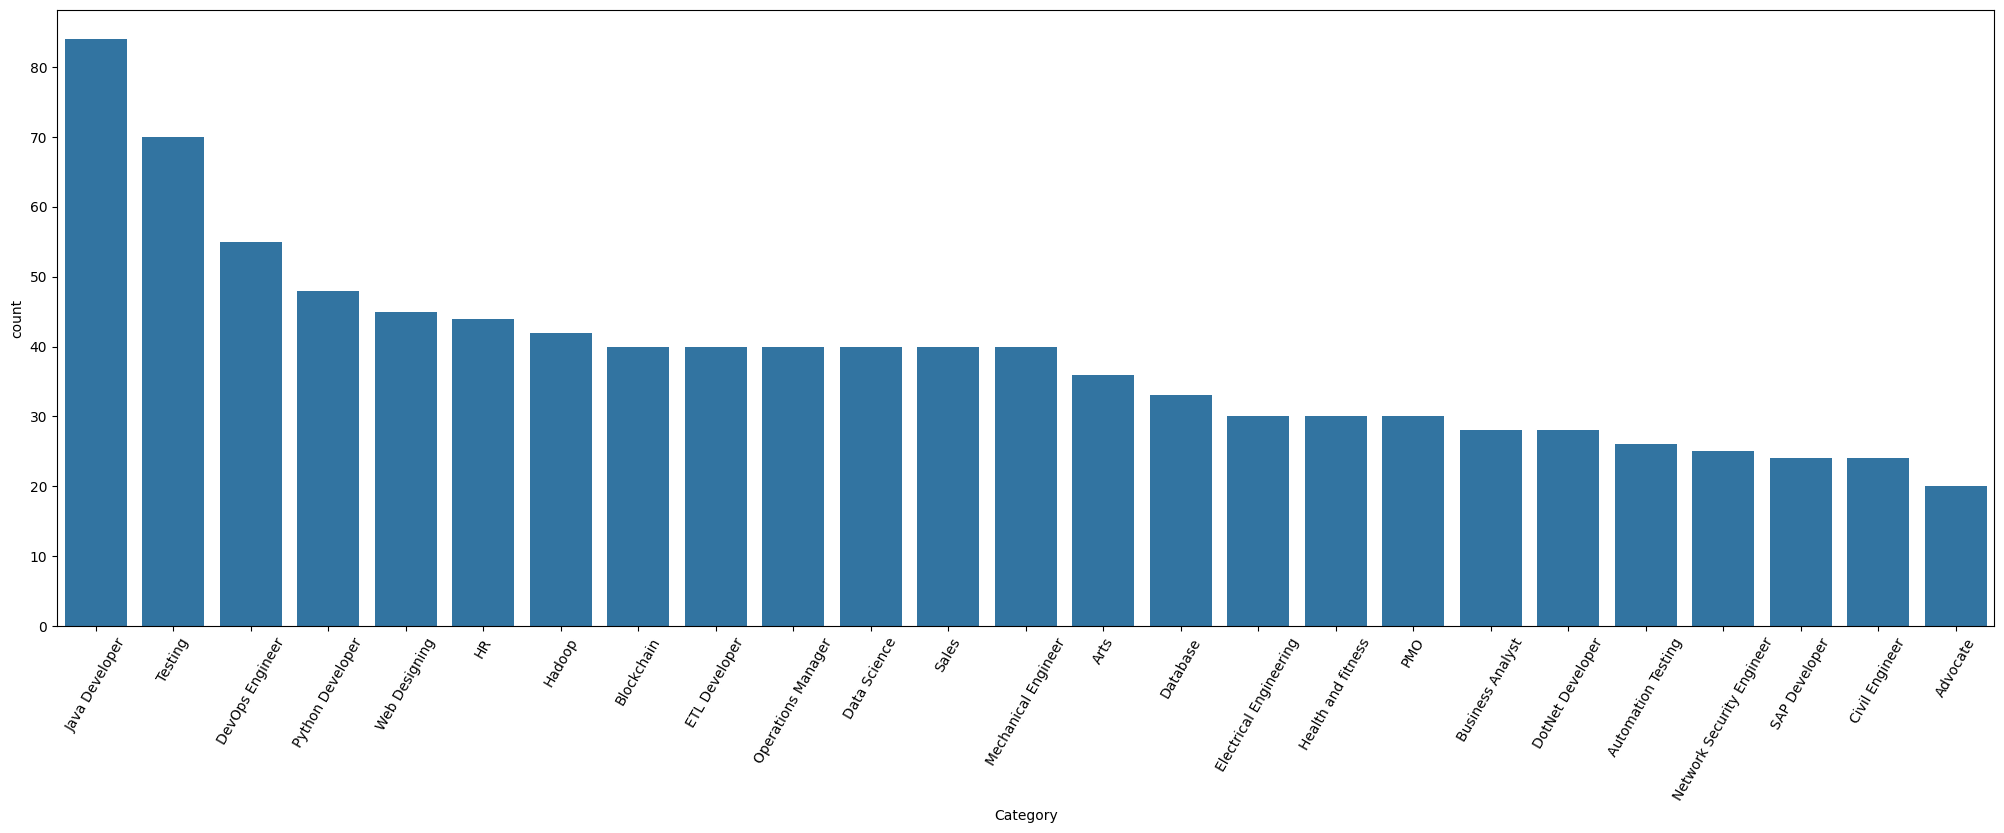

In [10]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)

# Show the plot
plt.show()

In [11]:
#Prepossing of the dataset
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [12]:
#Functions
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [13]:
#Applying columns
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))


In [14]:

df1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [15]:
from sklearn.preprocessing import LabelEncoder
df2= df1.copy()
df2['Category']= LabelEncoder().fit_transform(df2['Category'])


In [16]:
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [19]:
!pip install skillNer
!pip install nltk
!pip install spacy

ERROR: Could not find a version that satisfies the requirement pdfbox (from versions: none)
ERROR: No matching distribution found for pdfbox
  Preparing metadata (setup.py) ... done
  Created wheel for skillNer: filename=skillNer-1.0.3-py3-none-any.whl size=25625 sha256=6a0525013ad5e680944690007f1b5a89d4ba15ac33feb68bf1a63b6af1b83bba
  Stored in directory: /root/.cache/pip/wheels/9a/f1/7a/3201e01141cdb862654585eb16412785ed9973459639c351e4
Successfully built skillNer


In [20]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


In [21]:
import nltk

# Download the stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
#Stop words are generally the most common words in a language.
#English stop words from nltk:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [23]:
totalWords= []

In [24]:
Sentences= df2['Resume'].values

In [25]:
cleanedSentences= ""

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [29]:
wordfreqdist = nltk.FreqDist(totalWords)

In [30]:
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [31]:
mostcommon = wordfreqdist.most_common(30)

In [32]:
mostcommon


[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

In [33]:
#Model Arch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [34]:
Text= df2['cleaned_resume'].values
Target= df2['Category'].values

In [35]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

In [36]:
WordFeatures.shape

(962, 7351)

In [37]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


In [38]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()
}

In [40]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [41]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [42]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9805825242718447
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.966804979253112
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on t

In [43]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [45]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       0.88      0.78      0.82         9
           7       1.00      0.89      0.94         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      0.7

In [46]:
from sklearn.model_selection import cross_val_score, KFold

In [47]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [48]:
print("r2 scores")
print("*********************************")
for name, result in results.items():

    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

r2 scores
*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.958
----------------
OneVsRestClassifier(estimator=LogisticRegression()) : 0.99
----------------
OneVsRestClassifier(estimator=SVC()) : 0.997
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.996
----------------


In [49]:
# Function to predict job role for new resume
def predict_job_role(new_resume_text):
    processed_text = preprocess_text(new_resume_text)
    tfidf_vector = tfidf_vectorizer.transform([processed_text]).toarray()
    predicted_label = model.predict(tfidf_vector)[0]
    predicted_role = label_encoder.inverse_transform([predicted_label])[0]
    return predicted_role

In [55]:
# Function to count unique job roles in a specific domain
def count_job_roles_in_domain(df, domain):
    # Filter the DataFrame for the specified domain
    filtered_df = df[df['Category'] == domain]

    # Count unique job roles in the filtered DataFrame
    unique_roles = filtered_df['Category'].nunique()

    return unique_roles

In [60]:
# Example usage
domain = 'Civil Engineer'  # Change this to the desired domain
num_roles = count_job_roles_in_domain(df, domain)

print(f'The number of unique job roles in the domain "{domain}" is: {num_roles}')

The number of unique job roles in the domain "Civil Engineer" is: 1
